# Models of Theoretical Physics

## Exercise 1 - Central Limit Theorem and Random Walks

In this exercise we explore the dynamics of discrete random walks. 
We start with a simple random walk in one dimension, with one step to the left or right, and we show that the distribution of the position of the walker is Gaussian in the limit of many steps.

Let's start by importing the necessary libraries.
If some of these are not installed, the program will install them using pip. 
Remember that you can alway install them by running the following command in a cell:
```
!pip install numpy matplotlib tqdm seaborn
```

In [1]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    import seaborn as sns
except:
    print('Error: cannot import modules')
    print('Installing modules...')
    # install modules
    with open('requirements.txt') as f:
        requirements = f.read().splitlines()
        for r in requirements:
            !pip install {r}
            
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    import seaborn as sns

# set seaborn style
# this is a custom style that I created, but you can use any style you like
sns.set(rc={'figure.figsize':(3.5,3.5), 'figure.dpi':200, 'savefig.dpi':400, 'axes.linewidth': 3.5})
sns.set_theme(font="Avenir", font_scale=1.5, style="ticks", palette="colorblind", color_codes=True, 
              context="notebook", rc={'figure.figsize':(3.5,3.5), 
                                      'figure.dpi':200, 
                                      'savefig.dpi':400, 
                                      'axes.linewidth': 2.5})


Now let's define a function that performs a random walk of $T$ steps for $L$ random walkers, and returns the position of each walker at each step.

The probability of moving to the right is $p_+$, and the probability of moving to the left is $p_-=1-p_+$.


The initial position of each walker is $x_0$.

In the following we will use $p_+=0.5$, $x_0=0$, $L=1000$ and $T=1001$, but feel free to change these values and see what happens.


In [2]:
def random_walk(pp=0.5, L=1000, T=1000, x0=0):
    '''
    Random walk with probability of going up pp and down 1-pp
    L: number of walkers
    T: number of steps
    x0: initial position
    '''
    # initialize
    x = np.zeros((L, T))
    x[:, 0] = x0
    # random walk
    for t in tqdm(range(1, T)):
        # random numbers
        r = np.random.rand(L)
        # update position
        x[:, t] = x[:, t-1] + (r < pp)*2 - 1
    return x

In [3]:
pp = 0.5
L = 10000
T = 1001
x0 = 0

x = random_walk(pp=pp, L=L, T=T, x0=x0)

100%|██████████| 1000/1000 [00:00<00:00, 4937.05it/s]


Let's explore the trajectories. We will plot the trajectories of $l$ walkers.

In [5]:
# select l random walkers
l = 25
indexes = np.random.randint(0, L, l)

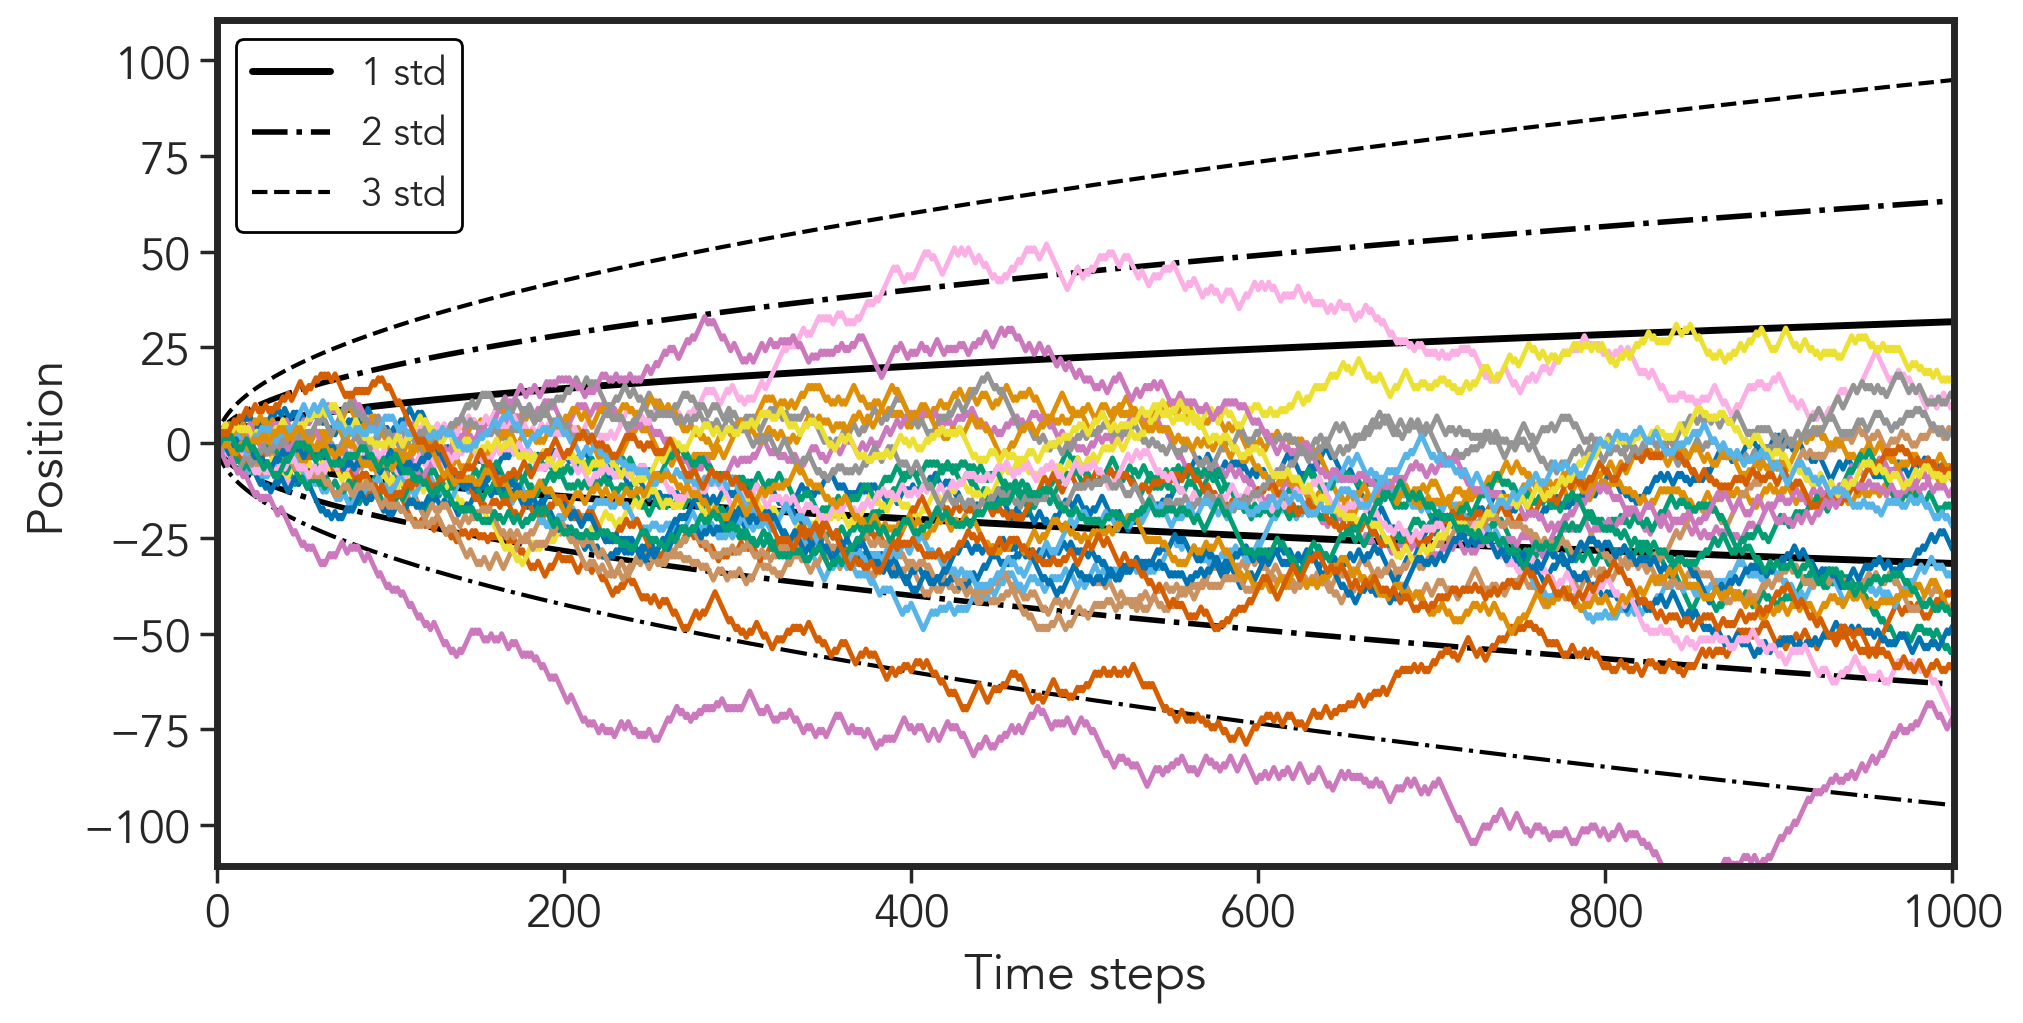

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), constrained_layout=True)

# plot 1, 2 and 3 standard deviations
t = np.arange(T)
std = np.sqrt(4*t*pp*(1-pp))
sns.lineplot(x=t, y=std, lw=2.5, color='black', alpha=1, label='1 std')
sns.lineplot(x=t, y=-std, lw=2.5, color='black', alpha=1)
sns.lineplot(x=t, y=2*std, lw=2, color='black', alpha=1, label='2 std', ls='-.')
sns.lineplot(x=t, y=-2*std, lw=2, color='black', alpha=1, ls='-.')
sns.lineplot(x=t, y=3*std, lw=1.5, color='black', alpha=1, label='3 std', ls='--')
sns.lineplot(x=t, y=-3*std, lw=1.5, color='black', alpha=1, ls='-.')

# plot the random walkers' trajectories
for index in indexes:
    sns.lineplot(x[index], lw=1.75, alpha=1)
    
ax.set_xlim(0, T)
ax.set_ylim(-std[-1]*3.5, std[-1]*3.5)
ax.set_xlabel('Time steps')
ax.set_ylabel('Position')
ax.legend(loc='upper left', fontsize=14, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

plt.show()

Let's see the distribution of the position of the walkers after a few steps.
Which properties do you notice? Why are there zeros?

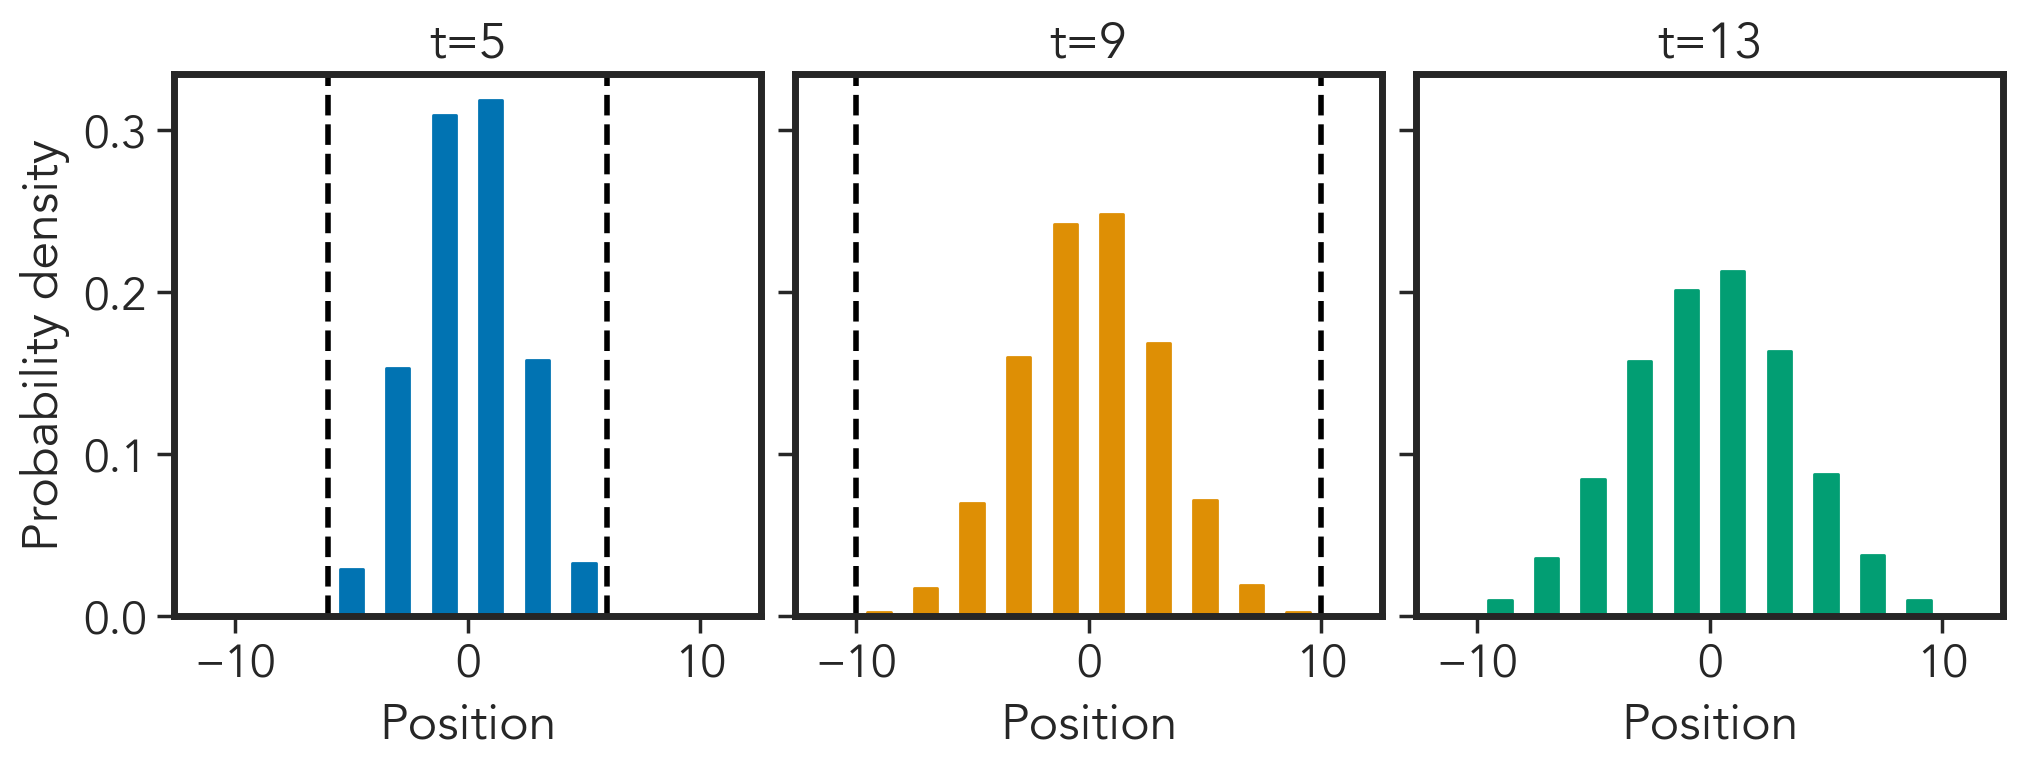

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3.75), constrained_layout=True, sharey=True)

#ts = np.array([4, 8, 12], dtype=int)
ts = np.array([5,9,13], dtype=int)
colors = sns.color_palette('colorblind', n_colors=3)

for i, ax in enumerate(axes):
    ax.set_xlim(-std[ts[-1]]*3.5, std[ts[-1]]*3.5)
    ax.set_xlabel('Position')
    ax.set_title(f't={ts[i]}')
    if i == 0:
        ax.set_ylabel('Probability density')

    # distribution of the final position
    bins = np.arange(-int(std[ts[-1]]*3), int(std[ts[-1]]*3)+1, 1)-0.5
    
    sns.histplot(x[:, ts[i]], bins=bins, stat='density', ax=ax, color=colors[i], alpha=1, element='step')
    #ax.hist(x[:, ts[i]], bins=bins, density=True, color=colors[i], alpha=1., align='right')
    
    # draw a vertical line at abs(ts[i])
    ax.axvline(x=ts[i]+1, lw=2, color='black', alpha=1, ls='--')
    ax.axvline(x=-(ts[i]+1), lw=2, color='black', alpha=1, ls='--')
    
    # gaussian distribution
    x_plot = np.linspace(-std[-1]*3.5, std[-1]*3.5, 1000)
    y_plot = np.exp(-(x_plot)**2/(2*std[ts[i]]**2))/(np.sqrt(2*np.pi)*std[ts[i]])
    #sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)


Let's see the distribution of the position of the walkers after a larger number of steps.
Which properties do you notice?

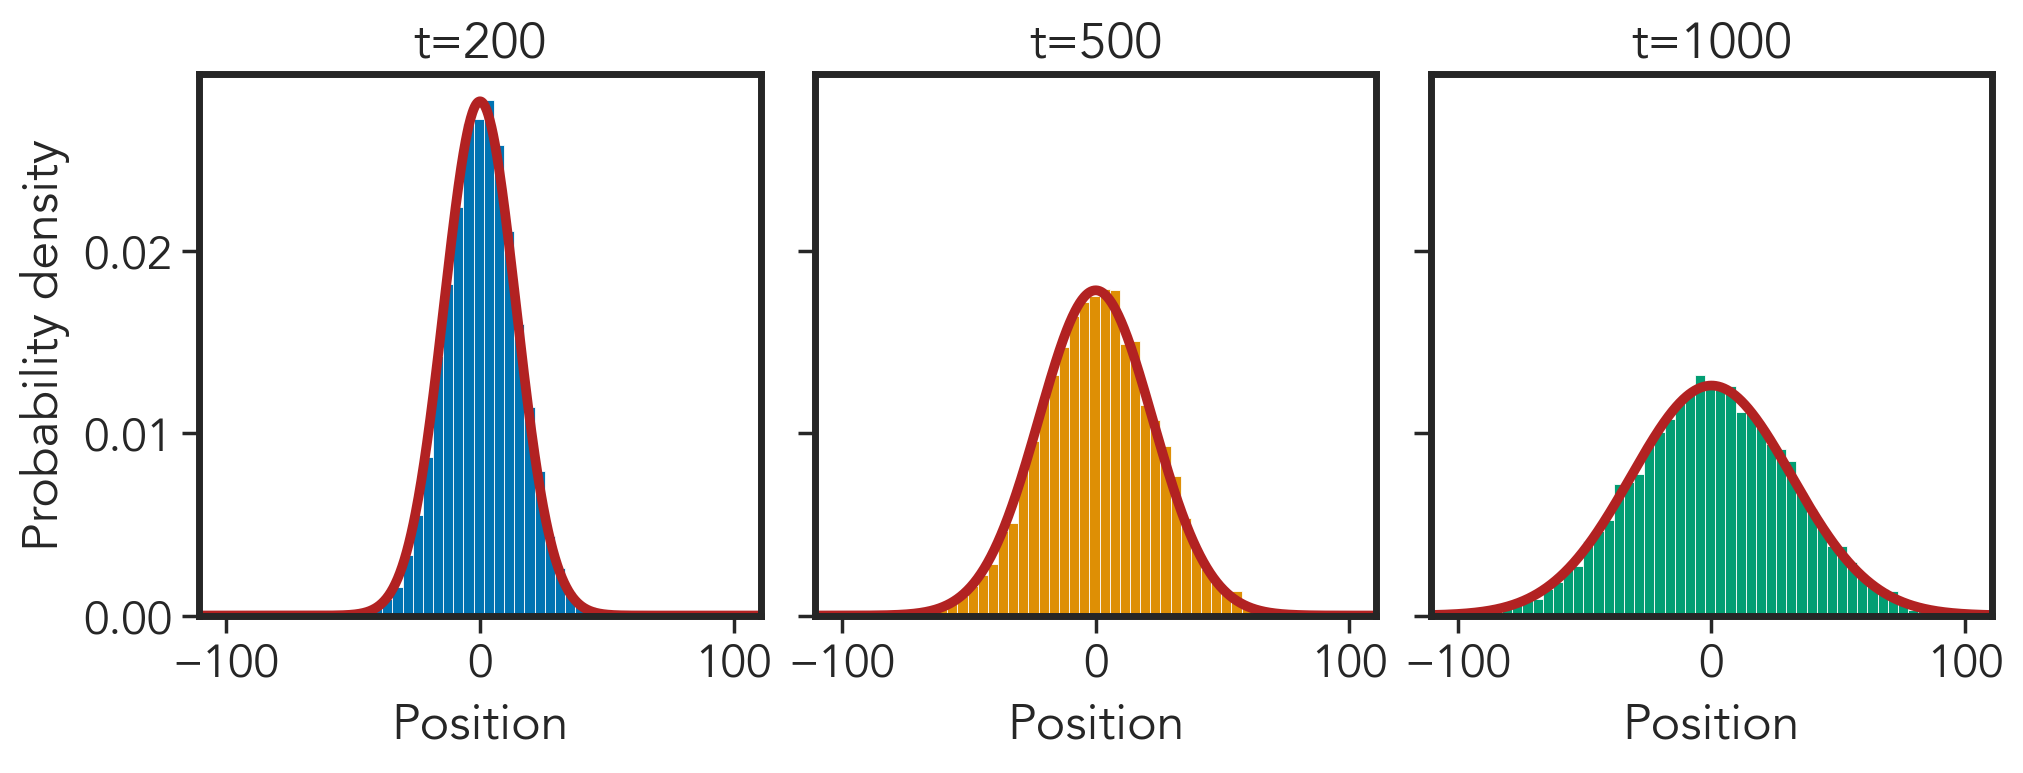

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3.75), constrained_layout=True, sharey=True)

ts = np.array([T/5, T/2, T-1], dtype=int)
colors = sns.color_palette('colorblind', n_colors=3)

for i, ax in enumerate(axes):
    ax.set_xlim(-std[-1]*3.5, std[-1]*3.5)
    ax.set_xlabel('Position')
    ax.set_title(f't={ts[i]}')
    if i == 0:
        ax.set_ylabel('Probability density')

    # distribution of the final position
    bins = np.arange(-int(std[-1]*3), int(std[-1]*3)+1, 4)-0.5
    sns.histplot(x[:, ts[i]], bins=bins, stat='density', ax=ax, color=colors[i], alpha=1)
    
    # gaussian distribution
    x_plot = np.linspace(-std[-1]*3.5, std[-1]*3.5, 1000)
    y_plot = np.exp(-(x_plot)**2/(2*std[ts[i]]**2))/(np.sqrt(2*np.pi)*std[ts[i]])
    sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)


Let's zoom in on the distribution of the position for large values: Gaussian is wrong. Why?

<Axes: title={'center': 't=200'}, xlabel='Position', ylabel='Probability density'>

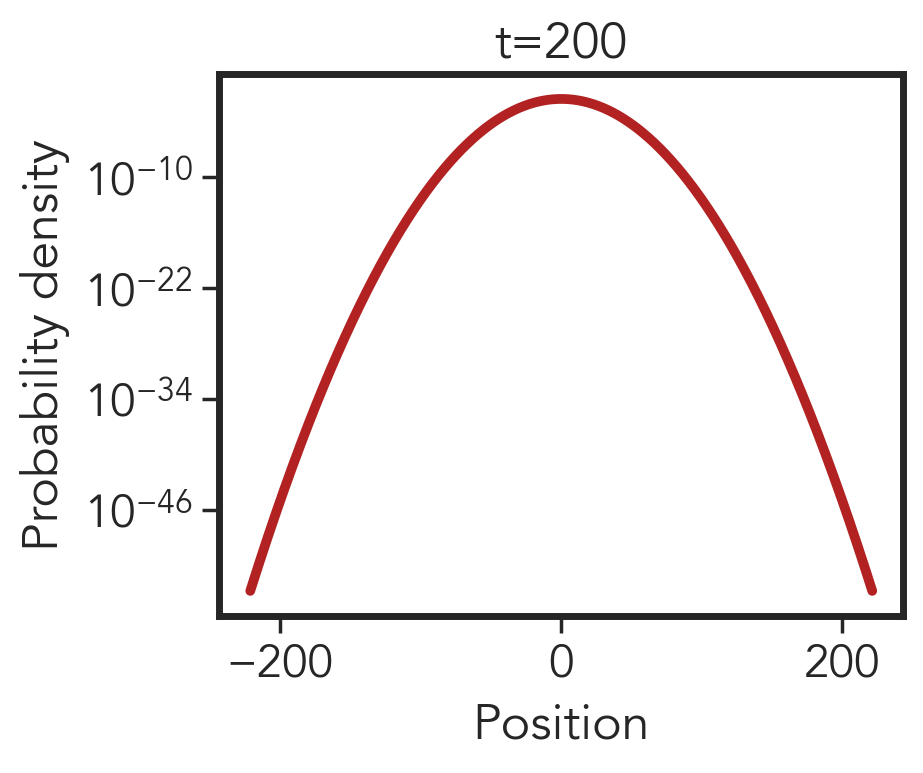

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.75), constrained_layout=True)
ax.set_xlabel('Position')
ax.set_ylabel('Probability density')
ax.set_title(f't={ts[0]}')
ax.set_yscale('log')

x_plot = np.linspace(-std[-1]*7, std[-1]*7, 1000)
y_plot = np.exp(-(x_plot)**2/(2*std[ts[0]]**2))/(np.sqrt(2*np.pi)*std[ts[0]])
sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)

    

## Part 2 - Random Walks with different microscopic steps

Here we will explore the dynamics of random walks with different microscopic steps. In particular, we allow the walker to jump multiple steps at a time, and also to stay in the same position.
What do you expect to happen?

In [44]:
def random_walk_jumps(p1=0.25, p2=0.25, L=1000, T=1000, x0=0):
    '''
    Random walk with probability of going right/left of one step p1 and two steps p2.
    p0 = 1 - 2*p1 - 2*p2 is the probability of staying in the same position.
    L: number of walkers
    T: number of steps
    x0: initial position
    '''
    assert 1- 2*p1 - 2*p2 >=0, 'p0 must be greater or equal than 0'
    # initialize
    x = np.zeros((L, T))
    x[:, 0] = x0
    # probability rates
    ps = [p2, p1, 1-2*p1-2*p2, p1, p2]
    steps = [-2, -1, 0, 1, 2]
    # random walk
    for t in tqdm(range(1, T)):
        # random steps
        dx = np.random.choice(steps, size=L, p=ps)
        # update position
        x[:, t] = x[:, t-1] + dx
    return x

In [93]:
p1 = 0.2
p2 = 0.1
L = 10000
T = 1001
x0 = 0

x_jumps = random_walk_jumps(p1=p1, p2=p2, L=L, T=T, x0=x0)

100%|██████████| 1000/1000 [00:00<00:00, 3125.73it/s]


In [94]:
# select l random walkers
l = 25
indexes = np.random.randint(0, L, l)

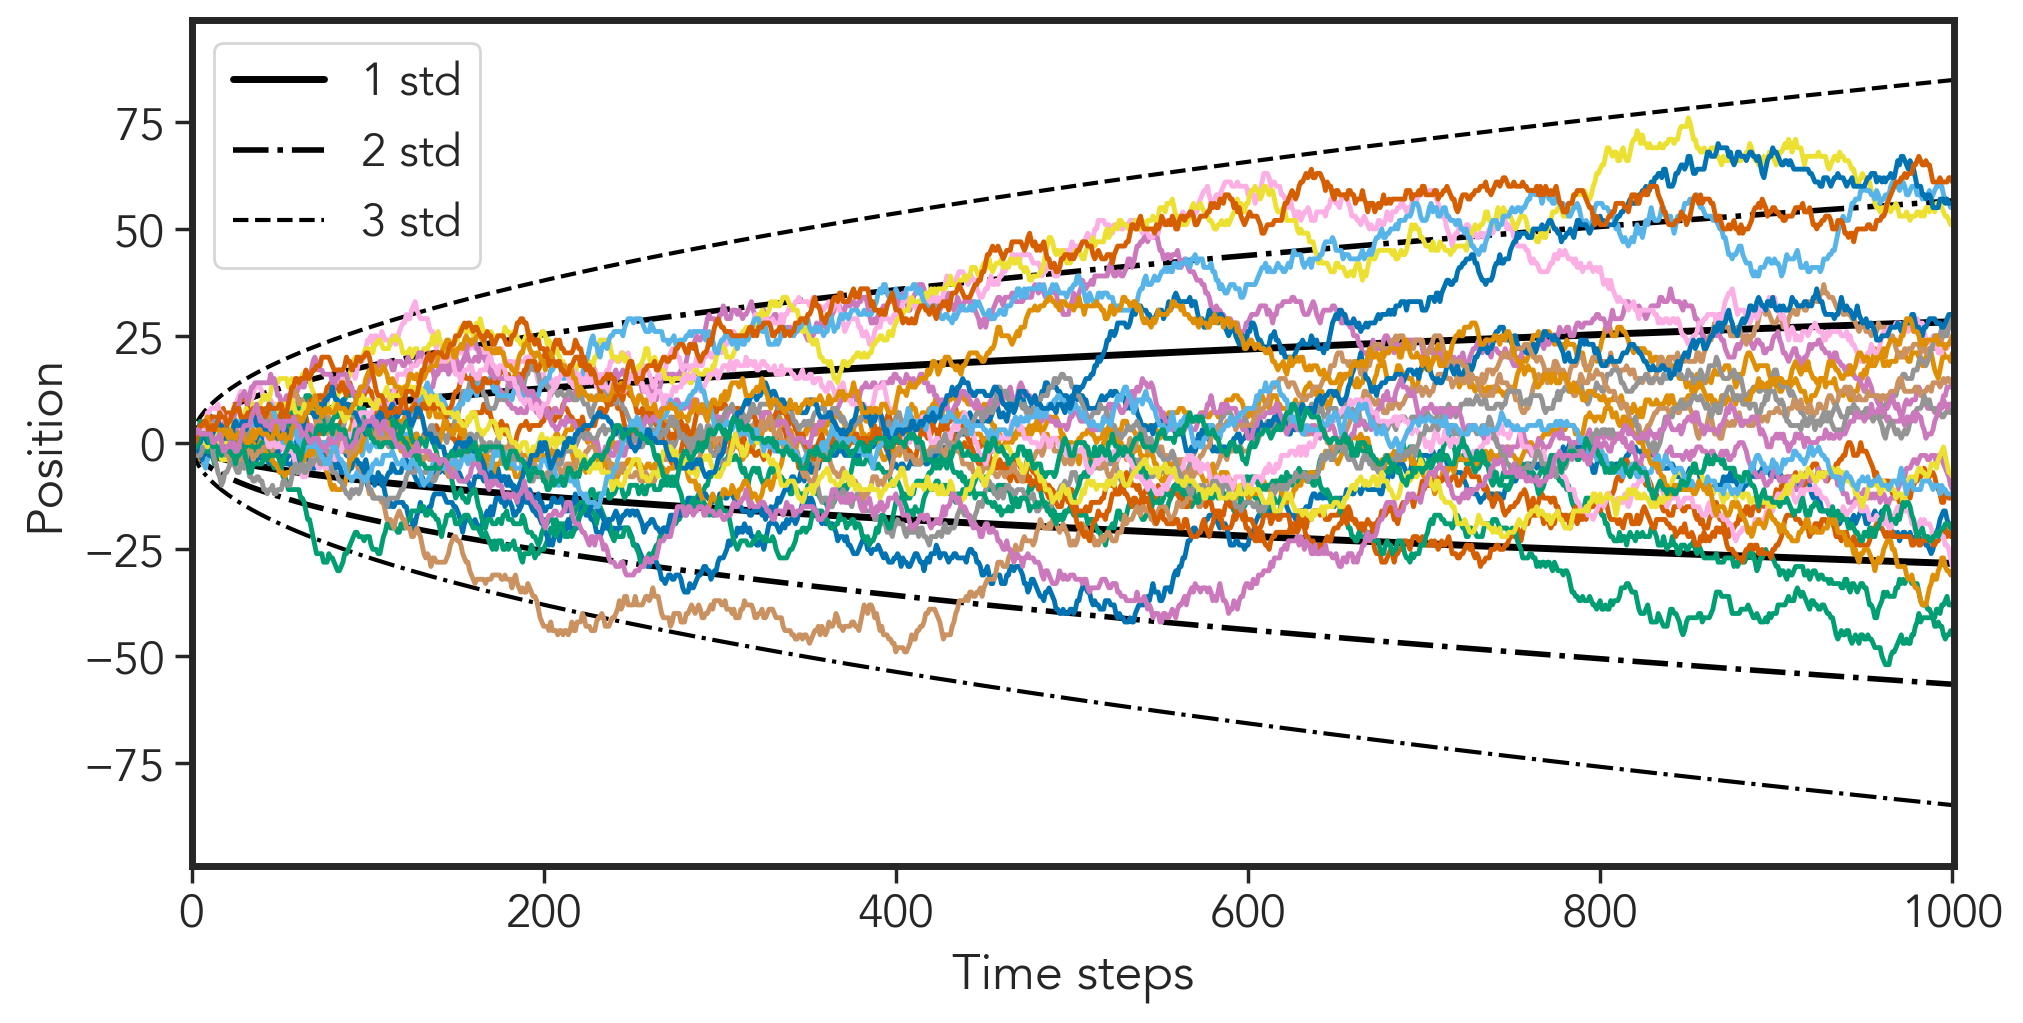

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), constrained_layout=True)

# plot 1, 2 and 3 standard deviations
t = np.arange(T)
# new formula for the std
std = np.sqrt((2*p1 + 4*p2)*t)

sns.lineplot(x=t, y=std, lw=2.5, color='black', alpha=1, label='1 std')
sns.lineplot(x=t, y=-std, lw=2.5, color='black', alpha=1)
sns.lineplot(x=t, y=2*std, lw=2, color='black', alpha=1, label='2 std', ls='-.')
sns.lineplot(x=t, y=-2*std, lw=2, color='black', alpha=1, ls='-.')
sns.lineplot(x=t, y=3*std, lw=1.5, color='black', alpha=1, label='3 std', ls='--')
sns.lineplot(x=t, y=-3*std, lw=1.5, color='black', alpha=1, ls='-.')

# plot the random walkers' trajectories
for index in indexes:
    sns.lineplot(x_jumps[index], lw=1.75, alpha=1)
    
ax.set_xlim(0, T)
ax.set_ylim(-std[-1]*3.5, std[-1]*3.5)
ax.set_xlabel('Time steps')
ax.set_ylabel('Position')
#ax.legend(loc='upper left', fontsize=14, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

plt.show()

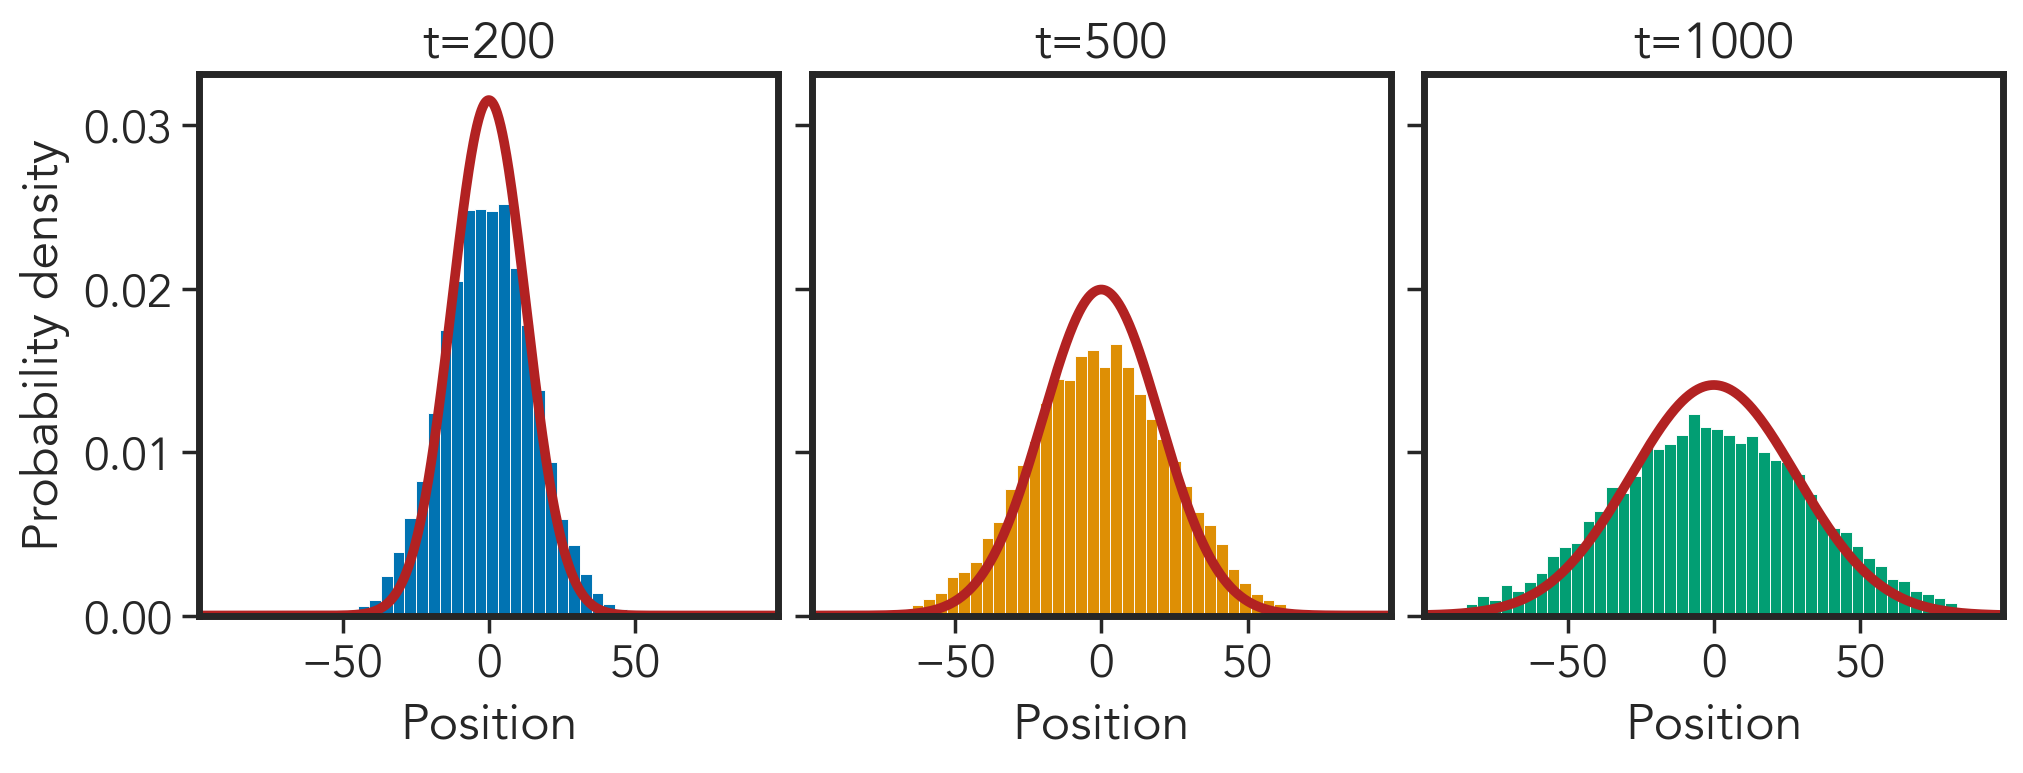

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3.75), constrained_layout=True, sharey=True)

ts = np.array([T/5, T/2, T-1], dtype=int)
colors = sns.color_palette('colorblind', n_colors=3)

for i, ax in enumerate(axes):
    ax.set_xlim(-std[-1]*3.5, std[-1]*3.5)
    ax.set_xlabel('Position')
    ax.set_title(f't={ts[i]}')
    if i == 0:
        ax.set_ylabel('Probability density')

    # distribution of the final position
    bins = np.arange(-std[-1]*3, std[-1]*3, 4)
    sns.histplot(x_jumps[:, ts[i]], bins=bins, stat='density', ax=ax, color=colors[i], alpha=1)
    
    # gaussian distribution
    x_plot = np.linspace(-std[-1]*3.5, std[-1]*3.5, 1000)
    y_plot = np.exp(-(x_plot)**2/(2*std[ts[i]]**2))/(np.sqrt(2*np.pi)*std[ts[i]])
    sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)
